# Epipolar Constraint

In [1]:
import numpy as np
import mediapy as media
import cv2
import os
from PIL import Image

import sys
sys.path.append(os.path.abspath('../..'))
from vis import draw_line
from pose import compute_fundamental_matrix

In [2]:
!wget -q -N -O img_A.png https://user-images.githubusercontent.com/7057863/128927765-5fc5b875-ab61-417c-92ee-6014336f4289.png --no-check-certificate
!wget -q -N -O img_B.png https://user-images.githubusercontent.com/7057863/128927776-4bf77d03-7074-4175-985d-adfcb72bb38a.png --no-check-certificate

img_A,img_B

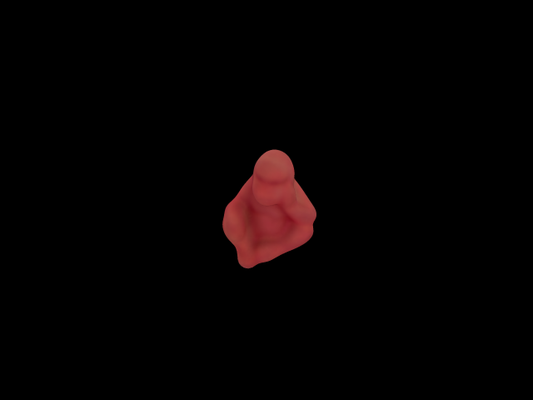
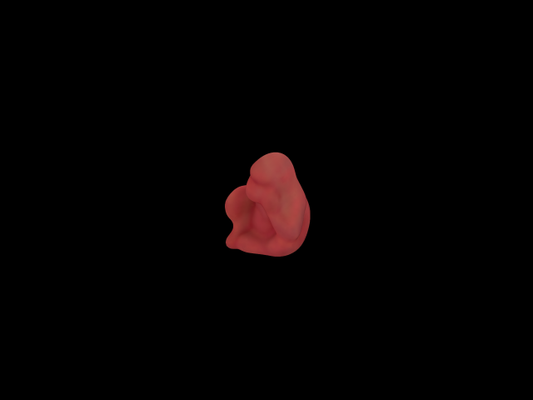

In [3]:
img_A = np.array(Image.open('img_A.png'))  # LineMOD/train/000001/rgb/000520.png
img_B = np.array(Image.open('img_B.png'))  # LineMOD/train/000001/rgb/000530.png

media.show_images([img_A, img_B], height=400, titles=['img_A', 'img_B'])

In [4]:
extrinsic_A = np.eye(4)
extrinsic_B = np.eye(4)
extrinsic_A[:3, :3] = np.array([-0.23749358, 0.97138911, 0.0, 0.55225338, 0.13501967, -0.82266998, -0.79913266, -0.19537884, -0.56851922]).reshape([3, 3])
extrinsic_B[:3, :3] = np.array([-0.88664634, 0.46244813, 0.0, 0.27705562, 0.53119546, -0.80066945, -0.37026809, -0.70991064, -0.59910636]).reshape([3, 3])
extrinsic_A[:3, -1] = np.array([0.0, 0.0, 400.0])
extrinsic_B[:3, -1] = np.array([0.0, 0.0, 400.0])
intrinsic_A = np.array([572.4114, 0.0, 325.2611, 0.0, 573.57043, 242.04899, 0.0, 0.0, 1.0]).reshape([3, 3])
intrinsic_B = intrinsic_A

img_A,img_B

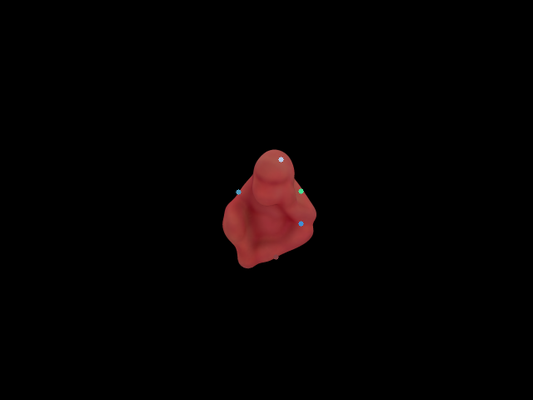
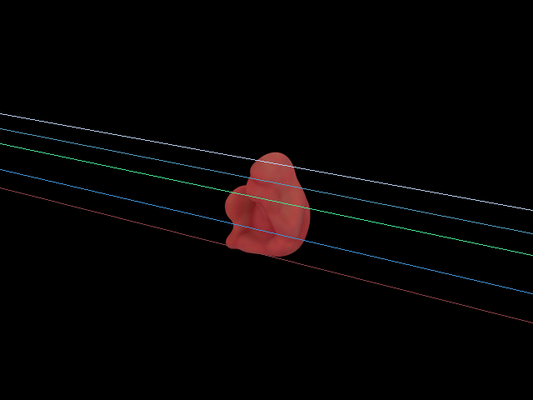

In [5]:
img_A_draw = np.copy(img_A)
img_B_draw = np.copy(img_B)
mask = np.any(np.asarray(img_A_draw) > 0, axis=2)[:, :, None]
H, W, _ = img_A_draw.shape

# Randomly sample points from img_A.
uv_As = []
for _ in range(5):
    y, x = np.unravel_index(np.random.choice(np.where(mask.flatten())[0]), [H, W])
    uv_As.append([x, y])
uv_As = np.array(uv_As)

# Compute F and the epipolar lines.
F = compute_fundamental_matrix(extrinsic_A, 
                               extrinsic_B,
                               intrinsic_A,
                               intrinsic_B)
epiplines_B = cv2.computeCorrespondEpilines(uv_As, 1, F)
epiplines_B = epiplines_B.reshape(-1, 3)

# Draw.
for pt, line in zip(uv_As, epiplines_B):
    color = tuple((255*np.random.rand(3)).tolist())
    img_A_draw = cv2.circle(img_A_draw, tuple(pt), 3, color, -1)
    img_B_draw = draw_line(img_B_draw, line, color=color)

media.show_images([img_A_draw, img_B_draw], height=400, titles=['img_A', 'img_B'])